In [1160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

DYSKRETYZACJA

zadanie 1 i 2

In [1161]:
def dyskretyzacja(f, Fs):
    t = np.arange(0, 1, 1 / Fs)
    s = np.sin(2 * np.pi * f * t)

    return t, s

zadanie 3

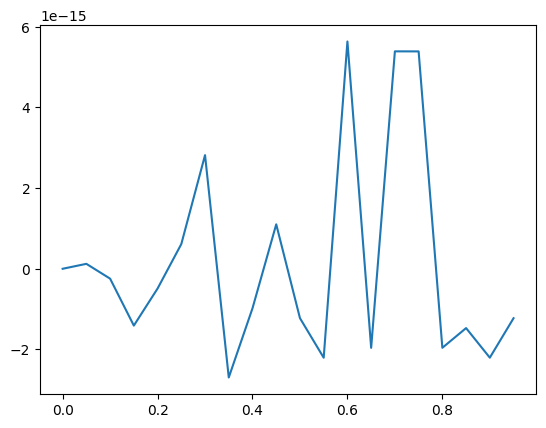

In [1162]:
x, y = dyskretyzacja(10, 20)
plt.plot(x, y)

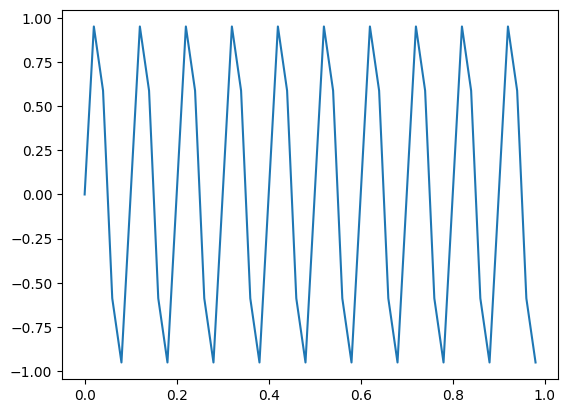

In [1163]:
x, y = dyskretyzacja(10, 50)
plt.plot(x, y)

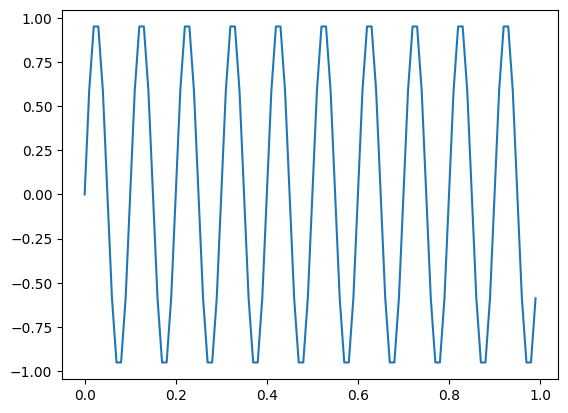

In [1164]:
x, y = dyskretyzacja(10, 100)
plt.plot(x, y)

zadanie 4

twierdzenie Nyquista–Shannona

zadanie 5

zjawisko aliasingu

zadanie 6

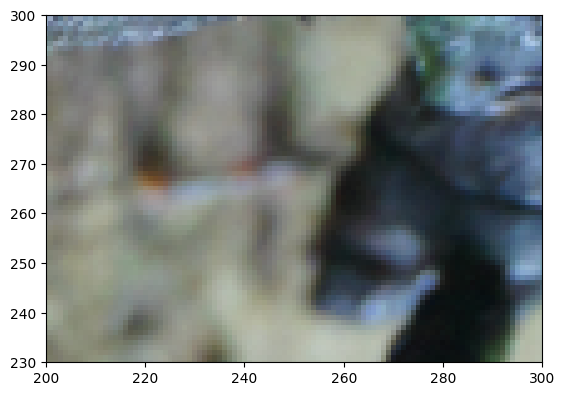

In [1165]:
image = plt.imread('./robal.png')
plt.xlim(200, 300)
plt.ylim(230, 300)
plt.imshow(image)

KWANTYZACJA

zadanie 2

In [1166]:
print(f"Liczba wymiarów wczytanej macierzy: {image.ndim}")

Liczba wymiarów wczytanej macierzy: 3


zadanie 3

In [1167]:
print(f"Najgłębszy wymiar składa się z {len(image[0][0])} wartości")

Najgłębszy wymiar składa się z 3 wartości


zadanie 4

In [1168]:
R = image[ :, :, 0]
G = image[ :, :, 1]
B = image[ :, :, 2]

wyznaczenie jasności piksela

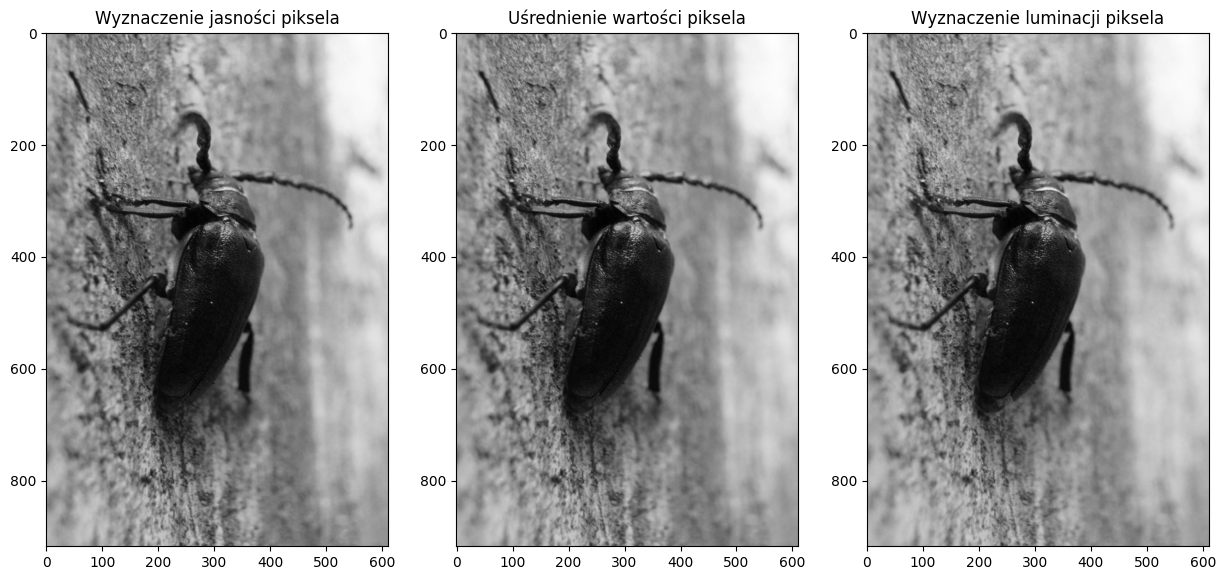

In [1169]:
szarosc1 = (np.maximum(R, B, G) + np.minimum(R, B, G)) / 2
szarosc2 = (R + G + B) / 3
szarosc3 = (R + R + R) 

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].set_title("Wyznaczenie jasności piksela")
axs[1].set_title("Uśrednienie wartości piksela")
axs[2].set_title("Wyznaczenie luminacji piksela")

axs[0].imshow(szarosc1, cmap=plt.get_cmap('gray'))
axs[1].imshow(szarosc2, cmap=plt.get_cmap('gray'))
axs[2].imshow(szarosc3, cmap=plt.get_cmap('gray'))

# axs[0].imshow(szarosc1)
# axs[1].imshow(szarosc2)
# axs[2].imshow(szarosc3)


zadanie 5

''

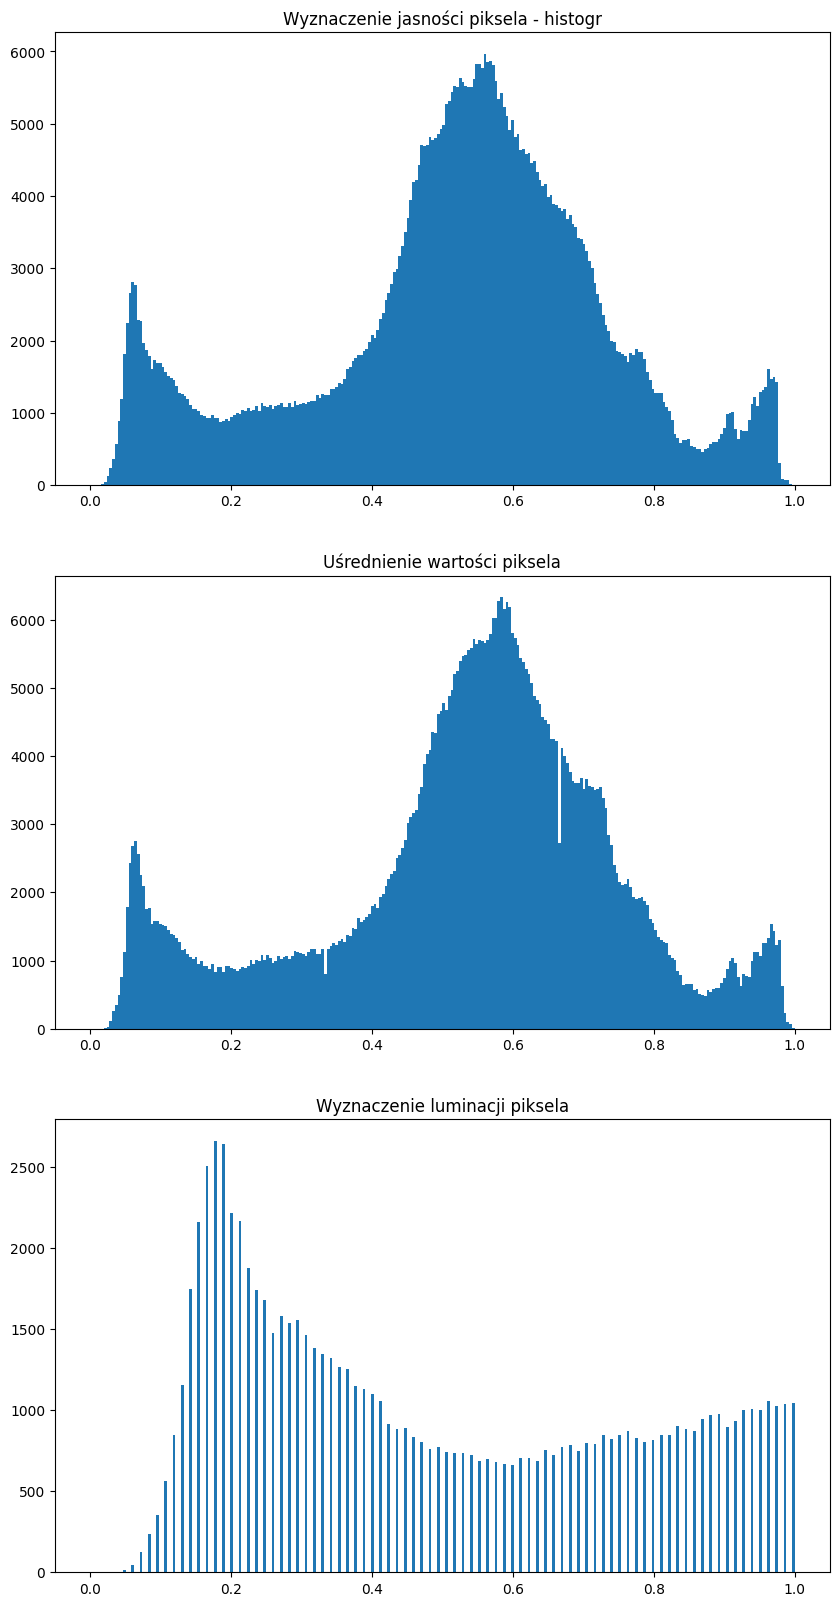

In [1170]:
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

axs[0].set_title("Wyznaczenie jasności piksela - histogr")
axs[1].set_title("Uśrednienie wartości piksela")
axs[2].set_title("Wyznaczenie luminacji piksela")

min = szarosc1.min()
max = szarosc1.max()

axs[0].hist(szarosc1.ravel(), bins=256, range=(0, 1))
axs[1].hist(szarosc2.ravel(), bins=256, range=(0, 1))
axs[2].hist(szarosc3.ravel(), bins=256, range=(0, 1))
# Dowiedzieć się ile koszyków powinno być

f""

zadanie 6

<BarContainer object of 16 artists>


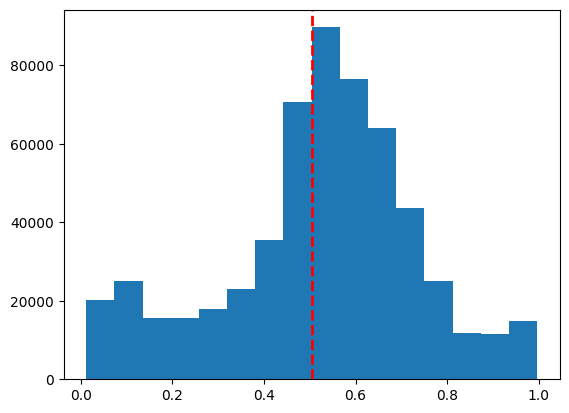

In [1171]:
x = plt.hist(szarosc1.ravel(), bins=16)
plt.axvline(x[1].mean(), color='red', linestyle='dashed', linewidth=2)
print(x[2])

zadanie 7

BINARYZACJA

zadanie 3, 4

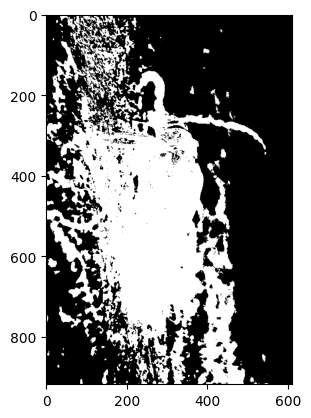

In [1172]:
image_b = szarosc1.copy()

histogram = plt.hist(image_b.ravel(), bins=256, range=(0, 1))
histogram = histogram[1].reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(histogram)
threshold = (kmeans.cluster_centers_[0, 0] + kmeans.cluster_centers_[1, 0]) / 2

# print(threshold)

# rows, columns = image_b.shape
# for row in range(rows):
#     for col in range(columns):
#         if image_b[row, col] > threshold:
#             image_b[row, col] = 0
#         else:
#             image_b[row, col] = 1

image_b = np.where(image_b > threshold, 0, 1)

plt.imshow(image_b)
